# Exercise 4

Work on this before the next lecture on 26 April. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to your GitHub repository for this course before the next lecture starts and post a link to your repository in [this thread](https://github.com/wildtreetech/advanced-computing-2018/issues/8). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

The overall idea of this exercise is to get you using and building convolutional neural networks.

## Question 1

In the last exercise you built a neural network that can classify fashion items using only densely connected layers.

Build on this by using convolutions, pooling, dropout, batch norm, etc in your neural network. Can you outperform your densely connected network?

Start with a small network and a fraction of the data to check if you hooked everything up correctly. Don't go overboard with the size of the network either as even small networks take quite a while to train.

(If you want to experiment with a free GPU checkout https://kaggle.com/kernels .)

#### Data Set

In [24]:
# plotting imports and setup
%matplotlib notebook

import matplotlib.pyplot as plt
import sklearn.metrics as skm
import numpy as np
import os
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [25]:
# Fashion MNIST is built into keras
from keras.datasets import fashion_mnist

In [26]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=1,
                                                  random_state=42)

In [27]:
from keras import utils

num_classes = 10
y_train_l = utils.to_categorical(y_train, num_classes)
y_val_l = utils.to_categorical(y_val, num_classes)
y_test_l = utils.to_categorical(y_test, num_classes)

In [28]:
X_train_ex = np.expand_dims(X_train,axis=3)
X_test_ex = np.expand_dims(X_test,axis=3)

In [29]:
# How is the data stored?
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)

Training data shape: (59999, 28, 28)
Training labels shape: (59999,)


In [30]:
def plot_image(image, label=None):
    label_map = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 
             4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
    fig, ax = plt.subplots()
    plt.imshow(image, cmap='gray')
    plt.title("{0}".format(label_map[label]));
    plt.show()

#### Neural network

In [13]:
from keras.models import Model
from keras.layers import Input, Dense, Activation, Flatten, MaxPool2D, Conv2D, BatchNormalization

In [33]:
input_image = Input(shape=(28, 28, 1))
x = Conv2D(32, 5, activation='relu')(input_image)
x = MaxPool2D(2, strides=2)(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(2, strides=2)(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(2, strides=2)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
convnet = Model(inputs=input_image, outputs=x)

convnet.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy']


batch_size = 128
history = convnet.fit(X_train_ex, y_train_l,
                  batch_size=batch_size,
                  epochs=20,
                  verbose=1,
                  validation_split=.3,
                    )

Train on 41999 samples, validate on 18000 samples
Epoch 1/20
41999/41999 [==============================] - 16s 377us/step - loss: 0.7771 - acc: 0.7101 - val_loss: 0.5672 - val_acc: 0.7920
Epoch 2/20
41999/41999 [==============================] - 13s 314us/step - loss: 0.5079 - acc: 0.8114 - val_loss: 0.4989 - val_acc: 0.8176
Epoch 3/20
41999/41999 [==============================] - 13s 315us/step - loss: 0.4360 - acc: 0.8416 - val_loss: 0.4272 - val_acc: 0.8444
Epoch 4/20
41999/41999 [==============================] - 13s 315us/step - loss: 0.3895 - acc: 0.8593 - val_loss: 0.4235 - val_acc: 0.8460
Epoch 5/20
41999/41999 [==============================] - 14s 325us/step - loss: 0.3586 - acc: 0.8700 - val_loss: 0.3977 - val_acc: 0.8526
Epoch 6/20
41999/41999 [==============================] - 14s 329us/step - loss: 0.3367 - acc: 0.8752 - val_loss: 0.3688 - val_acc: 0.8654
Epoch 7/20
41999/41999 [==============================] - 22s 514us/step - loss: 0.3149 - acc: 0.8827 - val_loss: 0.

<IPython.core.display.Javascript object>


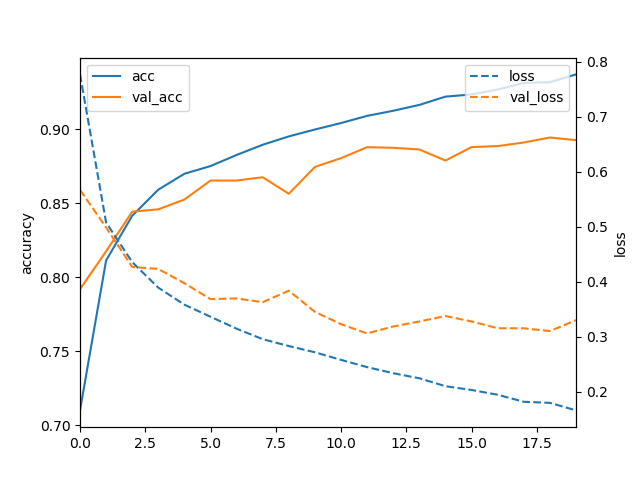

In [34]:
import pandas as pd

df = pd.DataFrame(history.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss");

## Question 2

For most real world applications we do not have enough labelled images to train a large neural network from scratch. Instead we can use a pre-trained network as a feature transformer and train a smaller model (or even just a logistic regression) on the output of the pre-trained network.

There are several pretrained networks available as part of keras: https://keras.io/applications/. The documentation usually gives some information or links about each network.

The documentation also contains snippets on how to use a pre-trained network as feature transformer ("Extract features with VGG16"). You should be able to generalise from that example using VGG16 to approximately any of the networks available there.

One important thing to not forget is that you need to preprocess your images before feeding them into a pretrained network. Keras provides the functions to do that as well, use them :) You might also need to resize your images first.

The task for this question is to build a classifier that can tell road bikes from mountain bikes. Start with using a pre-trained network as feature transformer and logistic regression as classifier on the output of the pretrained network. Once this works you can experiment with extracting features from earlier layers of the pre-trained network, compare your performance to a small network trained from scratch, try to beat your neural net by extracting features by hand and feeding them to a random forest, increasing your dataset size by [augmenting the data](https://keras.io/preprocessing/image/), etc.

The dataset containing about 100 labelled images for each road and mountain bikes is here: https://github.com/wildtreetech/advanced-computing-2018/blob/master/data/road-and-mountain-bikes.zip

### Read bike database

In [18]:
road_bikes = []
folder = './bikes/road_bikes/'
for img_path in os.listdir(folder):
    road_bikes.append(image.load_img(folder + img_path, target_size=(224, 224)))

road_bikes = [image.img_to_array(img) for img in road_bikes]

In [19]:
mountain_bikes = []
folder = './bikes/mountain_bikes/'
for img_path in os.listdir(folder):
    mountain_bikes.append(image.load_img(folder + img_path, target_size=(224, 224)))

mountain_bikes = [image.img_to_array(img) for img in mountain_bikes]

In [20]:
X = np.asarray(mountain_bikes + road_bikes) / 255
# X = [bike / 255 for bike in mountain_bikes + road_bikes]
y = np.asarray([1 for bike in mountain_bikes] + [0 for bike in road_bikes])

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1, random_state=42)

num_classes = 2
y_train_l = utils.to_categorical(y_train, num_classes)
y_val_l = utils.to_categorical(y_val, num_classes)

In [23]:
from keras import applications
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.backend import tf as ktf
import numpy as np


# for example load the VGG16 network
base_model = applications.InceptionV3(weights='imagenet')
x = base_model.output
# x = Dense(16, activation='relu')(x)
# x = Dense(16, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# for layer in base_model.layers:
#     layer.trainable = False
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x=X_train, y=y_train_l, epochs=5, validation_split=.3)

# # at this point, the top layers are well trained and we can start fine-tuning
# # convolutional layers from inception V3. We will freeze the bottom N layers
# # and train the remaining top layers.

# # let's visualize layer names and layer indices to see how many layers
# # we should freeze:
# for i, layer in enumerate(base_model.layers):
#    print(i, layer.name)

# # we chose to train the top 2 inception blocks, i.e. we will freeze
# # the first 249 layers and unfreeze the rest:
# for layer in model.layers[:249]:
#    layer.trainable = False
# for layer in model.layers[249:]:
#    layer.trainable = True

# # we need to recompile the model for these modifications to take effect
# # we use SGD with a low learning rate
# from keras.optimizers import SGD
# model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# # we train our model again (this time fine-tuning the top 2 inception blocks
# # alongside the top Dense layers
# model.fit(x=X_train, y=y_train_l)

Train on 147 samples, validate on 63 samples
Epoch 1/5
147/147 [==============================] - 38s 261ms/step - loss: 0.6737 - acc: 0.7891 - val_loss: 0.6474 - val_acc: 0.9206
Epoch 2/5
147/147 [==============================] - 28s 191ms/step - loss: 0.6373 - acc: 0.9660 - val_loss: 0.6276 - val_acc: 0.9683
Epoch 3/5
147/147 [==============================] - 28s 193ms/step - loss: 0.6240 - acc: 1.0000 - val_loss: 0.6201 - val_acc: 1.0000
Epoch 4/5
147/147 [==============================] - 28s 190ms/step - loss: 0.6174 - acc: 1.0000 - val_loss: 0.6217 - val_acc: 0.9524
Epoch 5/5
147/147 [==============================] - 28s 190ms/step - loss: 0.6239 - acc: 0.9320 - val_loss: 0.6142 - val_acc: 0.9841


### Simple NN

In [382]:
input_image = Input(shape=(224, 224, 3))
x = Conv2D(128, 5, activation='relu')(input_image)
x = MaxPool2D(2, strides=2)(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(2, strides=2)(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(2, strides=2)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(2, activation='softmax')(x)
convnet = Model(inputs=input_image, outputs=x)

convnet.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])


history = convnet.fit(X_train, y_train_l,
                  epochs=4,
                  verbose=1,
                  validation_split=.3,
                    )

Train on 147 samples, validate on 63 samples
Epoch 1/4
147/147 [==============================] - 16s 107ms/step - loss: 1.4761 - acc: 0.5306 - val_loss: 0.8952 - val_acc: 0.4921
Epoch 2/4
147/147 [==============================] - 13s 90ms/step - loss: 0.6047 - acc: 0.8776 - val_loss: 0.2812 - val_acc: 1.0000
Epoch 3/4
147/147 [==============================] - 13s 90ms/step - loss: 0.1993 - acc: 0.9728 - val_loss: 0.0304 - val_acc: 1.0000
Epoch 4/4
147/147 [==============================] - 13s 89ms/step - loss: 0.0210 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000


### Remarks

The pretrained network using InceptionV3 as a base model and a simple softmax as output manages to learn a good classifier. 

The problem is simple enough though that a small convolutional NN trained from scratch can manage to get the same performance.

## Question 3

Think about what project you want to do. What makes a good project? It should use some of what you learnt in this class, there should be labelled data available already, and it should be something you are interested in.

You will have to write a short report on what you did. To write an interesting report you need to tell a story, not just first I did A, then I did B, then I did X and finally D.

It also has to go a bit beyond simply training a classifier or regression model.

An example based on the bike images from the previous question:

A local bike shop wants to keep an eye on sales of bikes on ebay. They specialise in road bikes so they want to be able to filter out all adverts for mountain bikes. They have found that people writing ebay adverts are not very good at correctly labelling their adverts. Can they use machine-learning to help classify adverts?

We investigate labelling adverts based on the image in the advert and study different trade offs in misclassifying bikes. The network was trained on 100 images from a catalog which show bikes on a white background. We compare the performance of the network on the training data and a small set of hand labelled images of bikes in the wild.